<a href="https://colab.research.google.com/github/sivaroshan2007/ML-Predictive-models/blob/main/Risk_Prediction_system(diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 734k/734k [00:00<00:00, 861kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['diabetes'].unique()

array([0, 1])

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)
df

/tmp/ipython-input-707865421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)
/tmp/ipython-input-707865421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplac

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df['gender'].unique()

array([0, 1, 2])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Map categorical smoking_history to numeric frequencies
smoking_map = {
    'never': 0,       # 0 = never smoked
    'former': 1,      # 1 = former smoker
    'current': 2,     # 2 = current smoker
    'ever': 1,        # 1 = ever smoked (treat as former)
    'not current': 0  # 0 = not current (treat as never)
}

# Apply mapping - 'No Info' becomes NaN for imputation
df['smoking_history_num'] = df['smoking_history'].map(smoking_map)

print("Missing values before imputation:", df['smoking_history_num'].isna().sum())
print("Unique values before imputation:", sorted(df['smoking_history_num'].unique()))

# Step 2: Prepare data for Random Forest imputation
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]

# Separate known vs missing smoking data
known_mask = ~df['smoking_history_num'].isna()
X_train = X[known_mask]
y_train = df.loc[known_mask, 'smoking_history_num']

X_missing = X[~known_mask]

print(f"Training data: {X_train.shape[0]} rows")
print(f"Missing to predict: {X_missing.shape[0]} rows")

# Step 3: Train Random Forest and predict missing values
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict integer values for missing entries
predictions = rf.predict(X_missing)

# Fill missing values in original dataframe
df.loc[~known_mask, 'smoking_history_num'] = predictions

# Convert to nullable integer type (clean for ML)
df['smoking_history_num'] = df['smoking_history_num'].astype('Int64')

print("\n✅ IMPUTATION COMPLETE!")
print("Final unique values:", sorted(df['smoking_history_num'].unique()))
print("Missing values after imputation: 0")
print("Value counts:\n", df['smoking_history_num'].value_counts().sort_index())

# Feature importance (bonus - shows what predicts smoking best)
print("\nFeature importance for smoking prediction:")
importance_dict = dict(zip(features, rf.feature_importances_))
for feat, imp in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.1%}")


Missing values before imputation: 35816
Unique values before imputation: [np.float64(0.0), np.float64(nan), np.float64(1.0), np.float64(2.0)]
Training data: 64184 rows
Missing to predict: 35816 rows

✅ IMPUTATION COMPLETE!
Final unique values: [np.int64(0), np.int64(1), np.int64(2)]
Missing values after imputation: 0
Value counts:
 smoking_history_num
0    73096
1    16027
2    10877
Name: count, dtype: Int64

Feature importance for smoking prediction:
bmi: 40.6%
age: 23.7%
blood_glucose_level: 17.8%
HbA1c_level: 16.3%
hypertension: 0.8%
heart_disease: 0.7%


In [ ]:
df['smoking_history_num'].unique()

<IntegerArray>
[0, 2, 1]
Length: 3, dtype: Int64

In [ ]:
df['smoking_history_num'].isna().sum()

np.int64(0)

In [ ]:
df.drop('smoking_history',axis=1,inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num
0,0,80.0,0,1,25.19,6.6,140,0,0
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0
3,0,36.0,0,0,23.45,5.0,155,0,2
4,1,76.0,1,1,20.14,4.8,155,0,2
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,1
99998,0,24.0,0,0,35.42,4.0,100,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
 8   smoking_history_num  100000 non-null  Int64  
dtypes: Int64(1), float64(3), int64(5)
memory usage: 7.0 MB


EDA Part

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

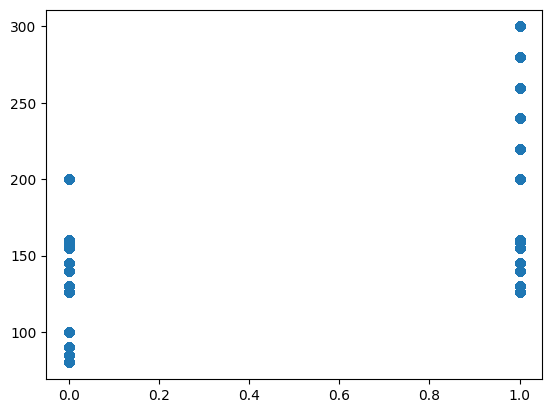

In [ ]:
x = df['diabetes']
y = df['blood_glucose_level']
plt.scatter(x,y)
plt.show()

In [ ]:
df['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240])

In [ ]:
pd.crosstab(df['diabetes'], df['blood_glucose_level'])

blood_glucose_level,80,85,90,100,126,130,140,145,155,158,159,160,200,220,240,260,280,300
diabetes,,,,,,,,,,,,,,,,,,
0,7106,6901,7112,7025,7066,7102,7107,7017,6976,7026,7093,7016,6953,0,0,0,0,0
1,0,0,0,0,636,692,625,662,599,0,666,696,647,603,636,635,729,674


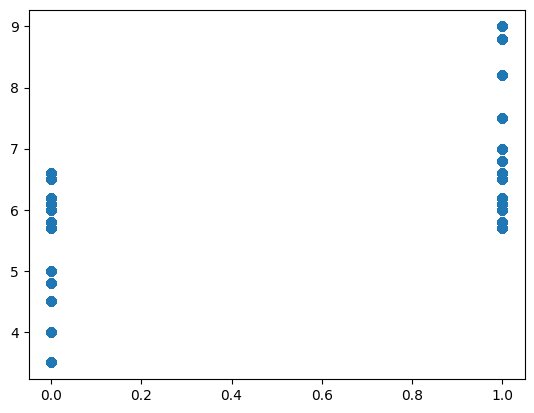

In [ ]:
plt.scatter(df['diabetes'],df['HbA1c_level'])
plt.show()

In [ ]:
pd.crosstab(df['HbA1c_level'], df['diabetes'])

diabetes,0,1
HbA1c_level,,
3.5,7662,0
4.0,7542,0
4.5,7585,0
4.8,7597,0
5.0,7471,0
5.7,7709,704
5.8,7662,659
6.0,7648,647
6.1,7397,651


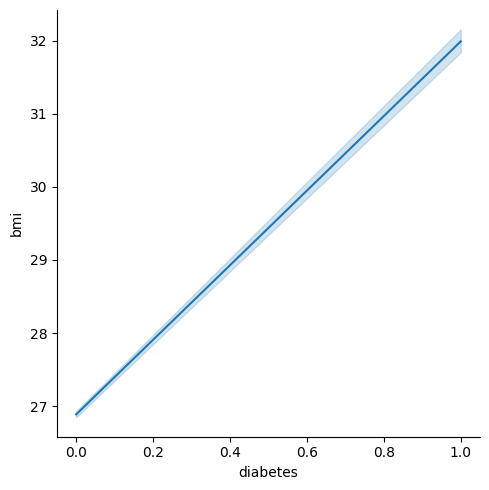

In [ ]:
a='bmi'
b='diabetes'
sns.relplot(data=df, x=b, y=a, kind="line")
plt.show()

In [ ]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num
0,0,80.0,0,1,25.19,6.6,140,0,0
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0
3,0,36.0,0,0,23.45,5.0,155,0,2
4,1,76.0,1,1,20.14,4.8,155,0,2
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,1
99998,0,24.0,0,0,35.42,4.0,100,0,0


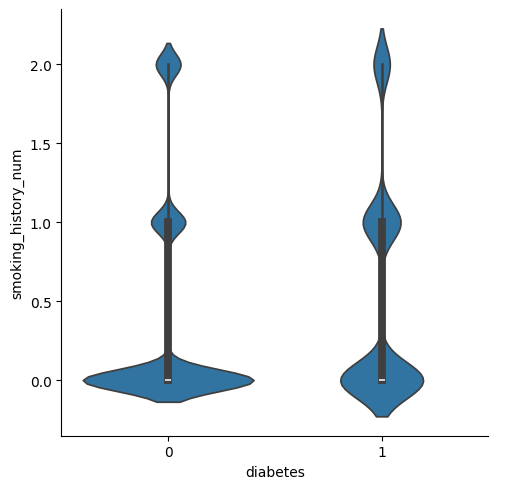

In [ ]:
sns.catplot(data=df, x="diabetes", y="smoking_history_num", kind="violin")

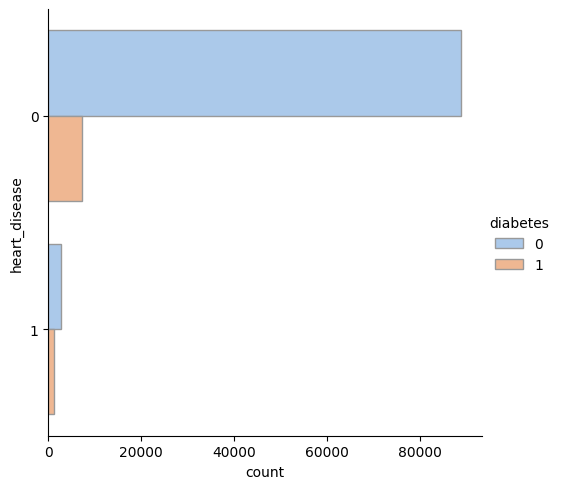

In [ ]:
sns.catplot(
    data=df, y="heart_disease", hue="diabetes", kind="count",
    palette="pastel", edgecolor=".6",
)

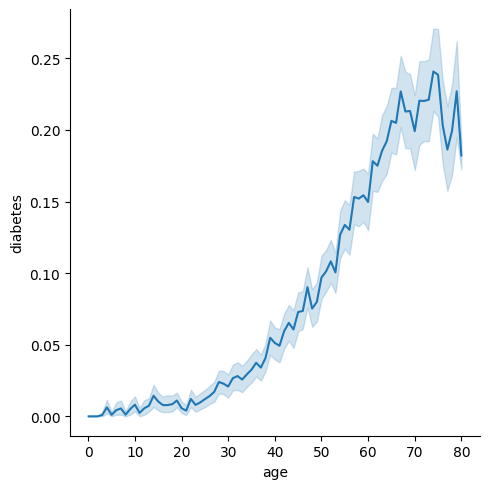

In [ ]:
sns.relplot(data=df, x="age", y="diabetes", kind="line")
plt.show()

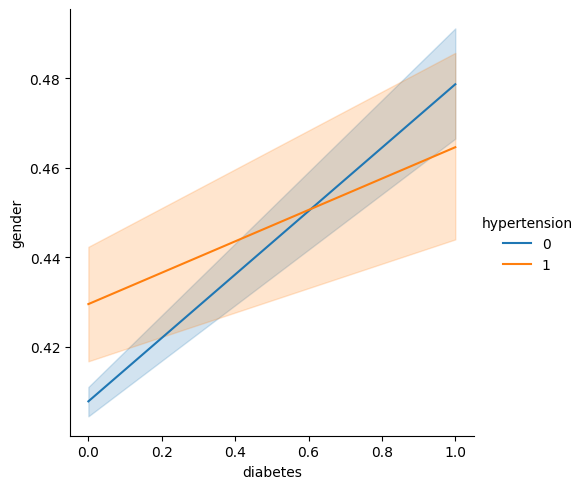

In [ ]:
sns.relplot(
    data=df, kind="line",
    x="diabetes", y="gender", hue="hypertension",
)
plt.show()

Statistical Analysis

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,0.414660,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.37781
std,0.493031,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.672766
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.0
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.0
50%,0.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.0
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.0
max,2.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,2.0


In [ ]:
df.median()

,0
gender,0.0
age,43.0
hypertension,0.0
heart_disease,0.0
bmi,27.32
HbA1c_level,5.8
blood_glucose_level,140.0
diabetes,0.0
smoking_history_num,0.0


In [ ]:
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: Q1={Q1}, Q3={Q3}, IQR={IQR}")
    #df[col] = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)][col]


bmi: Q1=23.63, Q3=29.58, IQR=5.949999999999999
HbA1c_level: Q1=4.8, Q3=6.2, IQR=1.4000000000000004
blood_glucose_level: Q1=100.0, Q3=159.0, IQR=59.0


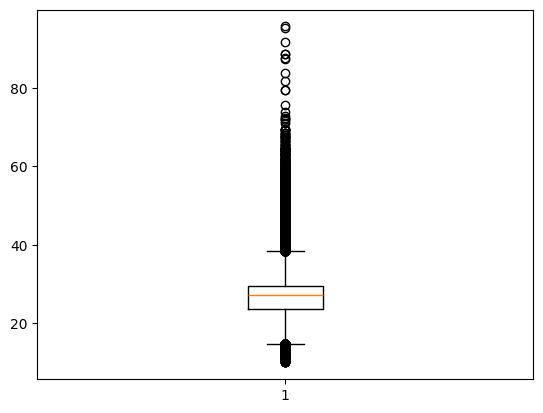

In [ ]:
plt.boxplot(df['bmi'])
plt.show()

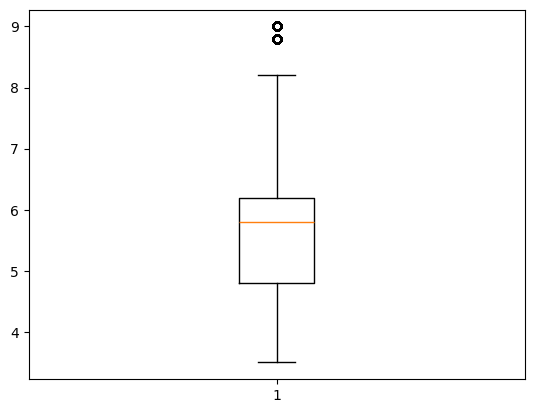

In [ ]:
plt.boxplot(df['HbA1c_level'])
plt.show()

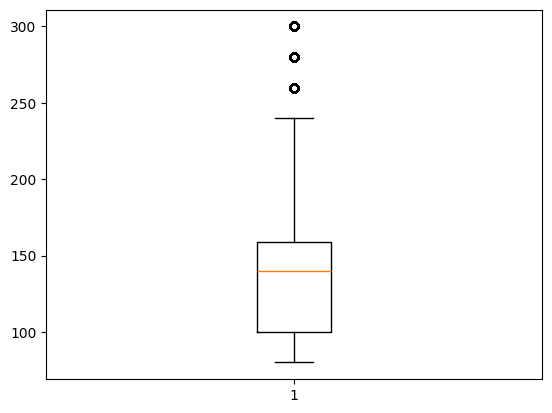

In [ ]:
plt.boxplot(df['blood_glucose_level'])
plt.show()

In [ ]:
bounds = {'bmi': (14.21, 39.00), 'HbA1c_level': (2.29, 8.71), 'blood_glucose_level': (40, 277.50)}

print("OUTLIERS CONTROLLED:")
for col, (lower, upper) in bounds.items():
    clipped_low = (df[col] == lower).sum()
    clipped_high = (df[col] == upper).sum()
    print(f"{col}: {clipped_low} clipped low, {clipped_high} clipped high "
          f"(min={df[col].min():.1f}, max={df[col].max():.1f})")


OUTLIERS CONTROLLED:
bmi: 5 clipped low, 11 clipped high (min=10.0, max=95.7)
HbA1c_level: 0 clipped low, 0 clipped high (min=3.5, max=9.0)
blood_glucose_level: 0 clipped low, 0 clipped high (min=80.0, max=300.0)


In [ ]:
lower_bmi, upper_bmi = 14.21, 39.00   # or whatever bounds you intended

print("Min/Max after supposed clipping:")
print(df['bmi'].min(), df['bmi'].max())

print("Counts at bounds:")
print("== lower:", (df['bmi'] == lower_bmi).sum())
print("== upper:", (df['bmi'] == upper_bmi).sum())


Min/Max after supposed clipping:
10.01 95.69
Counts at bounds:
== lower: 5
== upper: 11


Model Building

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_num
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,2
4,1,76.0,1,1,20.14,4.8,155,2
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,1
99998,0,24.0,0,0,35.42,4.0,100,0


In [ ]:
y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   smoking_history_num  100000 non-null  Int64  
dtypes: Int64(1), float64(3), int64(4)
memory usage: 6.2 MB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: diabetes
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


Building Risk Prediction Model for Non Diabetic Person

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import roc_auc_score
y_proba_test = model.predict_proba(X_test)[:, 1]
print("Test AUC:", roc_auc_score(y_test, y_proba_test))


Test AUC: 0.9618449694631951


In [ ]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_num
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,2
4,1,76.0,1,1,20.14,4.8,155,2
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,1
99998,0,24.0,0,0,35.42,4.0,100,0


In [ ]:
new_person = {
    'gender': 1,
    'age': 45,
    'hypertension': 1,
    'heart_disease': 1,
    'bmi': 29.5,
    'HbA1c_level': 5.9,
    'blood_glucose_level': 250,
    'smoking_history_num': 2
}
import pandas as pd
new_df = pd.DataFrame([new_person])

risk_prob = model.predict_proba(new_df)[:, 1][0]  # P(diabetes = 1)
print("Estimated diabetes risk:", risk_prob)


Estimated diabetes risk: 0.8263158629195522


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)          # 0/1 predictions
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.96065


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test)[:, 1]  # P(diabetes=1)
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", auc)

ROC-AUC: 0.9618449694631951


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_cardio = model.predict(X_test)
y_proba_cardio = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_cardio))


Accuracy: 0.96065
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000

ROC-AUC: 0.9618449694631951


Cardiovascular Disease Prediction For Diabetic Person

In [ ]:
df_cardio = df[df['diabetes'] == 1].copy()   # only people with diabetes
X_cardio = df_cardio[['age', 'gender', 'hypertension', 'bmi',
             'HbA1c_level', 'blood_glucose_level', 'smoking_history_num']]
y_cardio = df_cardio['heart_disease']   # complication label

In [ ]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8500 entries, 6 to 99979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               8500 non-null   int64  
 1   age                  8500 non-null   float64
 2   hypertension         8500 non-null   int64  
 3   heart_disease        8500 non-null   int64  
 4   bmi                  8500 non-null   float64
 5   HbA1c_level          8500 non-null   float64
 6   blood_glucose_level  8500 non-null   int64  
 7   diabetes             8500 non-null   int64  
 8   smoking_history_num  8500 non-null   Int64  
dtypes: Int64(1), float64(3), int64(5)
memory usage: 672.4 KB


In [ ]:
X_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8500 entries, 6 to 99979
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8500 non-null   float64
 1   gender               8500 non-null   int64  
 2   hypertension         8500 non-null   int64  
 3   bmi                  8500 non-null   float64
 4   HbA1c_level          8500 non-null   float64
 5   blood_glucose_level  8500 non-null   int64  
 6   smoking_history_num  8500 non-null   Int64  
dtypes: Int64(1), float64(3), int64(3)
memory usage: 539.6 KB


In [ ]:
y_cardio.info()

<class 'pandas.core.series.Series'>
Index: 8500 entries, 6 to 99979
Series name: heart_disease
Non-Null Count  Dtype
--------------  -----
8500 non-null   int64
dtypes: int64(1)
memory usage: 132.8 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(
    X_cardio, y_cardio, test_size=0.2, stratify=y_cardio, random_state=42
)

model_comp = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
model_comp.fit(X_train_cardio, y_train_cardio)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_cardio = model_comp.predict(X_test_cardio)
y_proba_cardio = model_comp.predict_proba(X_test_cardio)[:, 1]

print("Accuracy:", accuracy_score(y_test_cardio, y_pred_cardio))
print("Classification report:\n", classification_report(y_test_cardio, y_pred_cardio))
print("ROC-AUC:", roc_auc_score(y_test_cardio, y_proba_cardio))


Accuracy: 0.8405882352941176
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1447
           1       0.25      0.04      0.06       253

    accuracy                           0.84      1700
   macro avg       0.55      0.51      0.49      1700
weighted avg       0.76      0.84      0.79      1700

ROC-AUC: 0.6522859070558958


In [ ]:
new_diabetic = {
    'age': 45,
    'gender': 1,
    'hypertension': 1,
    'bmi': 30.2,
    'HbA1c_level': 10.0,
    'blood_glucose_level': 290,
    'smoking_history_num': 2
}
import pandas as pd
new_df = pd.DataFrame([new_diabetic])

risk_complication = model_comp.predict_proba(new_df)[:, 1][0]
print("Estimated heart-disease complication risk:", risk_complication)


Estimated heart-disease complication risk: 0.10333333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_comp = RandomForestClassifier(
    n_estimators=400,
    class_weight={0: 1, 1: 3},   # ↑ weight for minority class
    random_state=42
)
model_comp.fit(X_train_cardio, y_train_cardio)


RandomForestClassifier(class_weight={0: 1, 1: 3}, n_estimators=400,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Probabilities for class 1 (complication)
y_proba_cardio = model_comp.predict_proba(X_test_cardio)[:, 1]

for thr in [0.5, 0.4, 0.3, 0.25, 0.2]:
    y_pred_thr_cardio = (y_proba_cardio >= thr).astype(int)
    print(f"\n=== Threshold: {thr} ===")
    print(classification_report(y_test_cardio, y_pred_thr_cardio))



=== Threshold: 0.5 ===
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1447
           1       0.33      0.05      0.08       253

    accuracy                           0.84      1700
   macro avg       0.59      0.52      0.50      1700
weighted avg       0.78      0.84      0.79      1700


=== Threshold: 0.4 ===
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1447
           1       0.24      0.09      0.13       253

    accuracy                           0.82      1700
   macro avg       0.55      0.52      0.52      1700
weighted avg       0.76      0.82      0.79      1700


=== Threshold: 0.3 ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1447
           1       0.24      0.23      0.24       253

    accuracy                           0.78      1700
   macro avg       0.55      0.55      0.55      1700
we

In [ ]:
y_proba_cardio_new = model_comp.predict_proba(X_test_cardio)[:, 1]
threshold = 0.25
y_pred_cardio_new = (y_proba_cardio >= threshold).astype(int)

In [ ]:
y_pred_cardio_new = model_comp.predict(X_test_cardio)
y_proba_cardio_new = model_comp.predict_proba(X_test_cardio)[:, 1]

print("Accuracy:", accuracy_score(y_test_cardio, y_pred_cardio_new))
print("Classification report:\n", classification_report(y_test_cardio, y_pred_cardio_new))
print("ROC-AUC:", roc_auc_score(y_test_cardio, y_proba_cardio_new))

Accuracy: 0.8435294117647059
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1447
           1       0.31      0.04      0.08       253

    accuracy                           0.84      1700
   macro avg       0.58      0.51      0.50      1700
weighted avg       0.77      0.84      0.79      1700

ROC-AUC: 0.6486857092908593


In [ ]:
# 1. Probabilities from the SAME X_test used to build y_test
y_proba = model_comp.predict_proba(X_test_cardio)[:, 1]

# 2. Choose threshold
threshold = 0.25  # change this and rerun whole block

# 3. Recompute predictions based on the chosen threshold
y_pred_final = (y_proba >= threshold).astype(int)

# 4. Now evaluate
from sklearn.metrics import classification_report, accuracy_score
print("Threshold used:", threshold)
print(classification_report(y_test_cardio, y_pred_final))
print("Accuracy:", accuracy_score(y_test_cardio, y_pred_final))

new_diabetic = {
    'age': 25,
    'gender': 0,
    'hypertension': 1,
    'bmi': 30.2,
    'HbA1c_level': 10.0,
    'blood_glucose_level': 100,
    'smoking_history_num': 0
}
import pandas as pd
new_df = pd.DataFrame([new_diabetic])

risk_complication = model_comp.predict_proba(new_df)[:, 1][0]
print("Estimated heart-disease complication risk:", risk_complication)



Threshold used: 0.25
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1447
           1       0.25      0.36      0.29       253

    accuracy                           0.74      1700
   macro avg       0.56      0.58      0.57      1700
weighted avg       0.78      0.74      0.76      1700

Accuracy: 0.74
Estimated heart-disease complication risk: 0.0125


In [ ]:
print("Predicted positives:", y_pred_final.sum())

Predicted positives: 373
